# One Fluid Dispersion Relation
author: Louis Richard

Solves one fluid dispersion relation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pyrfu.dispersion import one_fluid_dispersion

Load IGRF coefficients ...


## Local conditions

### Magnetic field

In [2]:
b_0 = 10e-9

### Angle of propagation

In [3]:
theta = 5.0

### Particles

In [4]:
ions = {"n": 10e6, "t": 10, "gamma": 1}
electrons = {"n": 10e6, "t": 10, "gamma": 1}

## Solve one fluid dispersion relation

In [5]:
wc_1, wc_2, wc_3 = one_fluid_dispersion(10e-9, 5, ions, electrons)

## Plot

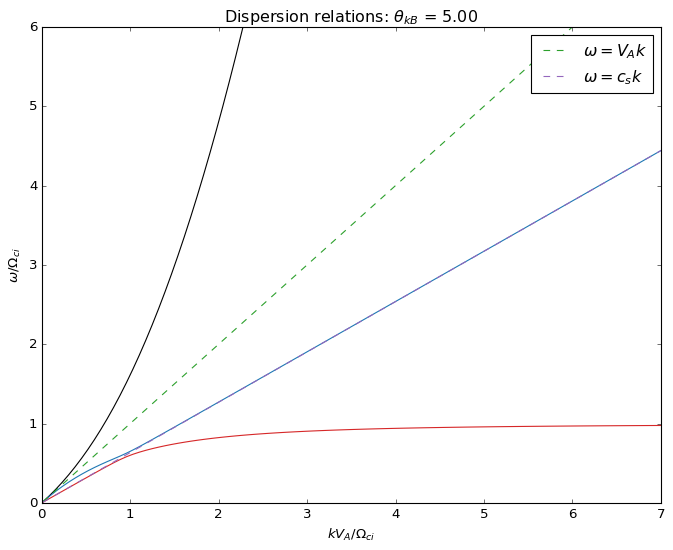

In [10]:
v_a, c_s, wc_p = [wc_1.attrs[k] for k in ["v_a", "c_s", "wc_p"]]

k = wc_1.k.data

f, ax = plt.subplots(1, figsize=(9, 7))
f.subplots_adjust(hspace=0, left=0.07, right=0.93, bottom=0.10, top=0.95)
ax.plot(k * v_a / wc_p, wc_1 / wc_p, color="k")
ax.plot(k * v_a / wc_p, wc_2 / wc_p, color="tab:blue")
ax.plot(k * v_a / wc_p, wc_3 / wc_p, color="tab:red")
ax.plot(
    k * v_a / wc_p,
    v_a * k / wc_p,
    color="tab:green",
    linestyle="--",
    label="$\\omega = V_A k$",
)
ax.plot(
    k * v_a / wc_p,
    c_s * k / wc_p,
    color="tab:purple",
    linestyle="--",
    label="$\\omega = c_s k$",
)

ax.set_xlim([0, 7])
ax.set_ylim([0, 6])
ax.legend()
ax.set_xlabel("$k V_A / \\Omega_{ci}$")
ax.set_ylabel("$\\omega / \\Omega_{ci}$")
ax.set_title(f"Dispersion relations: $\\theta_{{kB}}$ = {theta:3.2f}")

f.savefig("../../_static/example_dispersion_one_fluid_nb_thumbnail.png", dpi=100)